## 2024S-T3 AML 3104 - Neural Networks and Deep Learning

Instructor: Ishant Gupta

Student: Antonio Carlos De Mello Mendes - c0866063@mylambton.ca

### Algerian Forest Fires Data

In [113]:
# Loading libraries
import pandas as pd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
file = "Algerian_forest_fires_cleaned.csv"
df_aff = pd.read_csv(file, header = 0)

# Display the first 5 entries of df_pat Dataframe
df_aff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
# Check the frequency distributions for the target variable
df_aff['Classes']=df_aff['Classes'].str.strip()
df_aff['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

* Summary of data types, missing data, and number of rows

In [4]:
df_aff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


* Distribution of numerical and categorical data

In [5]:
df_aff.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## Data Wrangling/Encoding:

* Data inspection
* Handling missing values
* Checking for duplicates
* Outlier detection
* Data transformation

#### Data Inspection

In [6]:
# Checking for columns with missing values
df_aff.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [7]:
# Check for duplicates
df_aff.duplicated().sum()

0

In [51]:
# Replace zeros for maintaining the integrity of the dataset and avoid biases introduced by arbitrary zero
df_aff['Rain']=df_aff['Rain'].replace(0,df_aff['Rain'].mean())
df_aff['ISI']=df_aff['ISI'].replace(0,df_aff['ISI'].median())
df_aff['FWI']=df_aff['FWI'].replace(0,df_aff['FWI'].mean())

### Outliers detection

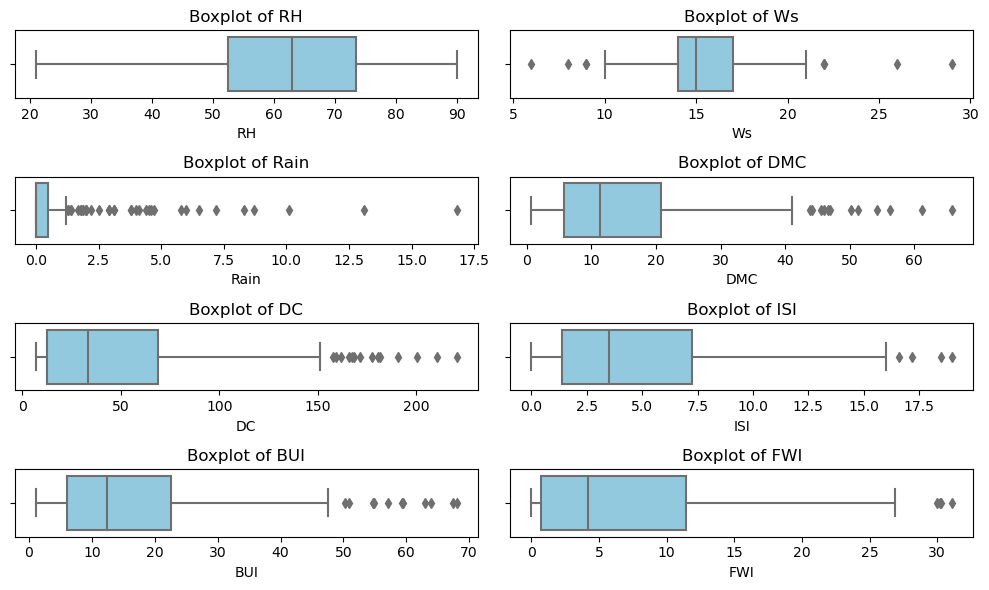

In [8]:
# Select columns for visualization
columns_to_visualize = ['RH', 'Ws', 'Rain', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Calculate the number of rows and columns for the subplot grid
num_columns = len(columns_to_visualize)
num_rows = int(np.ceil(num_columns / 2))

# Create a subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 6))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate over columns and create boxplots
for i, column in enumerate(columns_to_visualize):
    sns.boxplot(x = df_aff[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Data Preprocessing


* Data normalizarion, scaling and transformation

In [9]:
# Using standardization for scaling data outliers

# For numeric columns
numeric_cols = ['Ws', 'Rain', 'DMC', 'DC', 'FWI']

for column in numeric_cols:
  df_aff[numeric_cols] = (df_aff[numeric_cols] - df_aff[numeric_cols].mean()) / df_aff[numeric_cols].std()

df_aff.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,-0.531349,-0.380871,85.4,0.106458,-0.103447,4.5,16.9,-0.071956,fire,1
239,27,9,2012,28,87,-0.175653,1.815607,41.1,-0.660101,-0.869198,0.1,6.2,-0.945545,not fire,1
240,28,9,2012,27,87,4.804099,-0.131271,45.9,-0.902172,-0.871296,0.4,3.4,-0.918665,not fire,1
241,29,9,2012,24,54,0.891437,-0.330951,79.7,-0.837620,-0.718146,1.7,5.1,-0.851466,not fire,1
242,30,9,2012,24,64,-0.175653,-0.281031,67.3,-0.877965,-0.690873,1.2,4.8,-0.878346,not fire,1


### Exploring the correlation within features and the target variable:

* Upon analize the frequency counts for Regions (0 and 1) and Classes ('Fire' and 'Not Fire') as a target variable.
* 'Classes' feature is categorical that represents the behaviour if is fire or not fire according to the rating of the moisture content in litter and other cured fine fuels (FFMC).

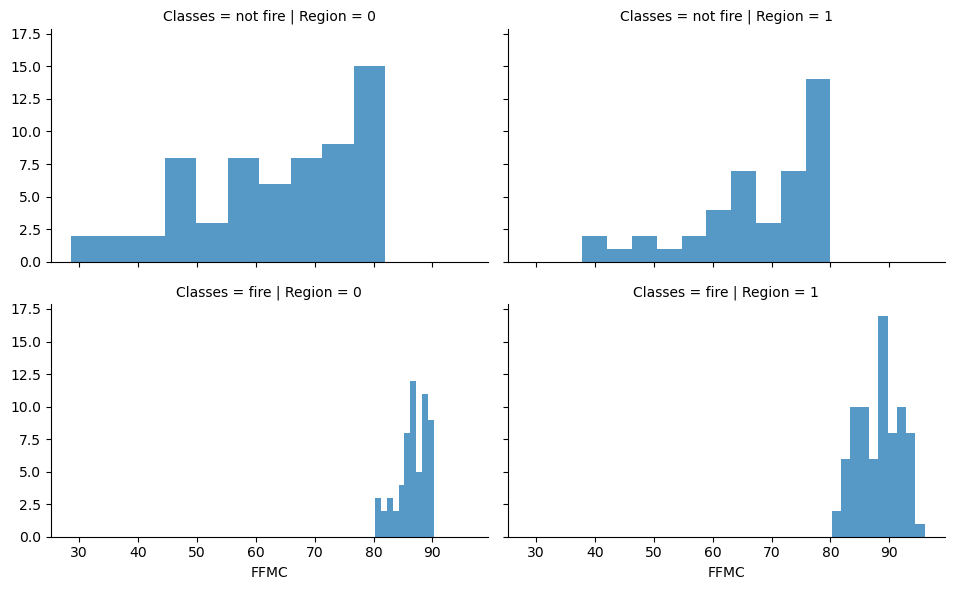

In [10]:
grid = sns.FacetGrid(df_aff, col='Region', row='Classes', aspect=1.6)
grid.map(plt.hist, 'FFMC', alpha=.75, bins=10)
grid.add_legend()

* The temperature can influence the ignition of fire according to the following distribution.

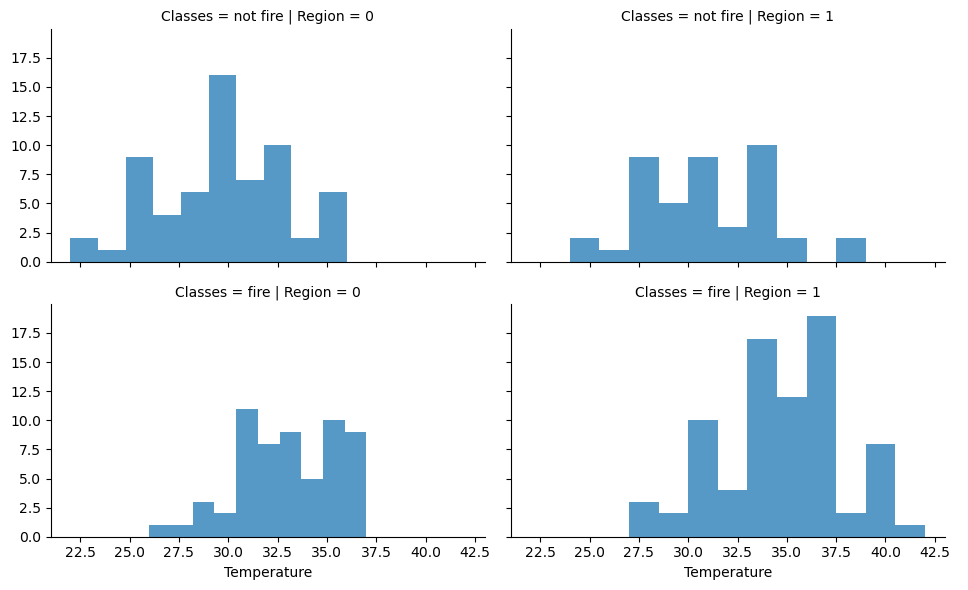

In [56]:
grid = sns.FacetGrid(df_aff, col='Region', row='Classes', aspect=1.6)
grid.map(plt.hist, 'Temperature', alpha=.75, bins=10)
grid.add_legend()

* The number of fire events has occurred more often than non-fire events

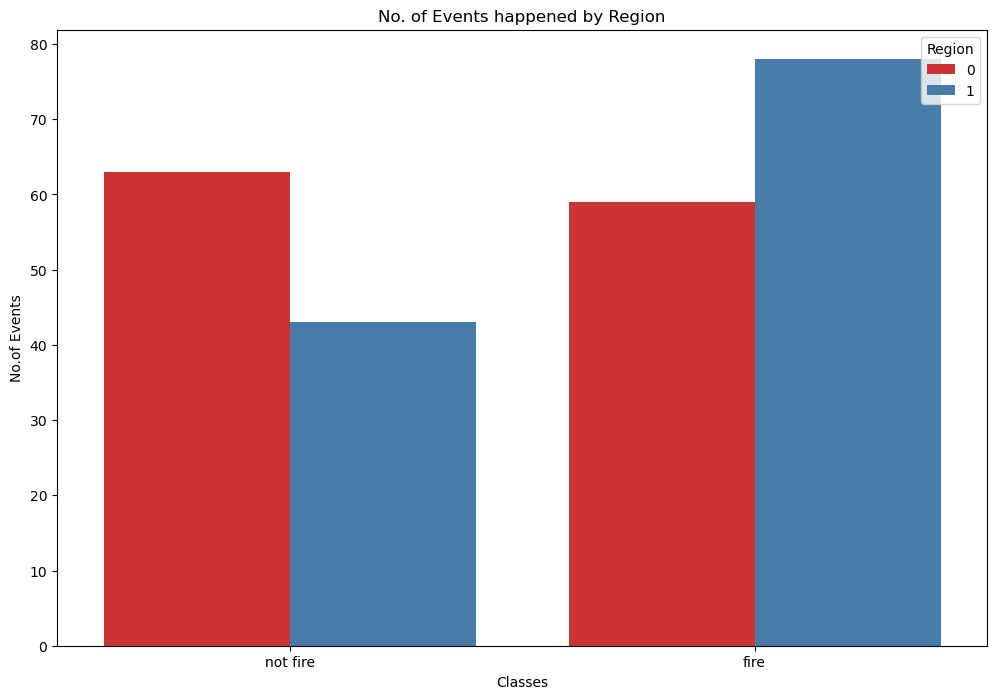

In [15]:
  plt.figure(figsize=(12,8))
  axis = sns.countplot(x = "Classes", hue = "Region", palette = "Set1", data = df_aff)
  axis.set(title = "No. of Events happened by Region", xlabel = "Classes",ylabel = "No.of Events")
  plt.legend(loc='upper right', title='Region')
  plt.show()

* Feature Engineering

In [11]:
# Convert class label to numbers
df_aff['Target'] = df_aff['Classes'].map({'not fire':0, 'fire':1})

# Drop the other categorical variables
df_aff = df_aff.drop(['Classes', 'Region'], axis=1)

In [12]:
# Using standardization for scaling other features

# For numeric columns
numeric_cols = ['Temperature', 'RH', 'FFMC', 'ISI', 'BUI']

for column in numeric_cols:
  df_aff[numeric_cols] = (df_aff[numeric_cols] - df_aff[numeric_cols].mean()) / df_aff[numeric_cols].std()

df_aff.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
238,26,9,2012,-0.593230,0.199542,-0.531349,-0.380871,0.526676,0.106458,-0.103447,-0.058347,0.014722,-0.071956,1
239,27,9,2012,-1.144492,1.683206,-0.175653,1.815607,-2.560509,-0.660101,-0.869198,-1.117507,-0.737294,-0.945545,0
240,28,9,2012,-1.420123,1.683206,4.804099,-0.131271,-2.226006,-0.902172,-0.871296,-1.045292,-0.934084,-0.918665,0
241,29,9,2012,-2.247016,-0.542289,0.891437,-0.330951,0.129454,-0.837620,-0.718146,-0.732358,-0.814604,-0.851466,0
242,30,9,2012,-2.247016,0.132103,-0.175653,-0.281031,-0.734679,-0.877965,-0.690873,-0.852717,-0.835689,-0.878346,0


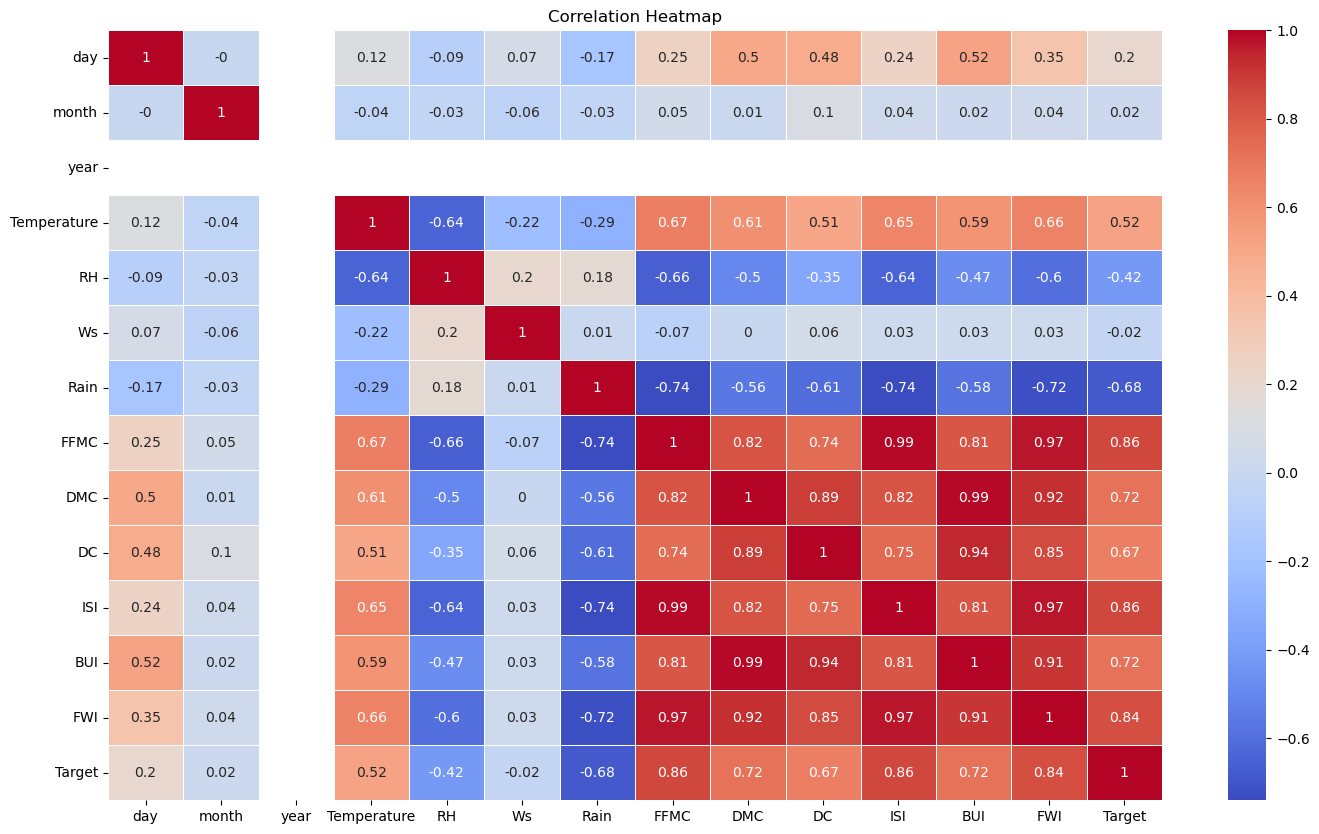

In [13]:
# Detecting multicollinearity to stop data leakage

# Compute the correlation matrix between all features
correlation_matrix = df_aff.corr(method='spearman').round(2)

plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth = 0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()

* Feature Selection using Variance Inflation Factor

In [27]:
# Check multicollinearity using variance inflation factor to find the higher vif rate, e.g., year and BUI have the highest rate)
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = pd.DataFrame()

df_vif['feature'] = X.columns
df_vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif

,feature,vif
0,day,1.487120
1,month,1.088510
2,year,57.701582
3,Temperature,2.415204
4,RH,2.764923
5,Ws,1.312931
6,Rain,1.551373
7,FFMC,4.120286
8,DMC,76.480443
9,DC,25.363045


In [ ]:
# Drop the column that contains the highest vif value
X.drop('BUI', axis=1, inplace = True)

In [ ]:
# Split the data into input variables and target variables
X = df_aff.drop('Target', axis = 1) # Input variables
y = df_aff['Target'] # Target variable

In [85]:
# Split the dataset into Train and Test
from sklearn.model_selection import train_test_split

# Split the model with parameter test_size as 0.38 when the test dataset is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.38, random_state=42)

## Building the models

#### Multiple Linear Regression

In [86]:
# Define the model
from sklearn.linear_model import LinearRegression

# Define metric to evaluate models ahead
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize an object given the model
mlr = LinearRegression()

# Train the Multiple Linear Regression Model
mlr.fit(X_train, y_train)

LinearRegression()

#### Polynomial Regression Model

In [87]:
# Define the model
from sklearn.preprocessing import PolynomialFeatures

plm = PolynomialFeatures(degree = 2, include_bias = False)
X_plm = plm.fit_transform(X)

In [19]:
# The shape represents the number of features was increased
X_plm.shape

(243, 104)

In [88]:
# Split the model with parameter test_size as 0.38 when the test dataset is small
X_train_plm, X_test_plm, y_train_plm, y_test_plm = train_test_split(X_plm, y, test_size = 0.38, random_state = 42)

In [89]:
# Create an object given the Linear Regression Model
lrm = LinearRegression()

# Train the model
lrm.fit(X_train_plm, y_train_plm)

LinearRegression()

#### Decision Tree Model

In [102]:
# Define the model  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize an object given the model
dtc = DecisionTreeClassifier()

# Train the Multiple Linear Regression Model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
# Values accept for the target variable
y_train.value_counts()

1    84
0    66
Name: Target, dtype: int64

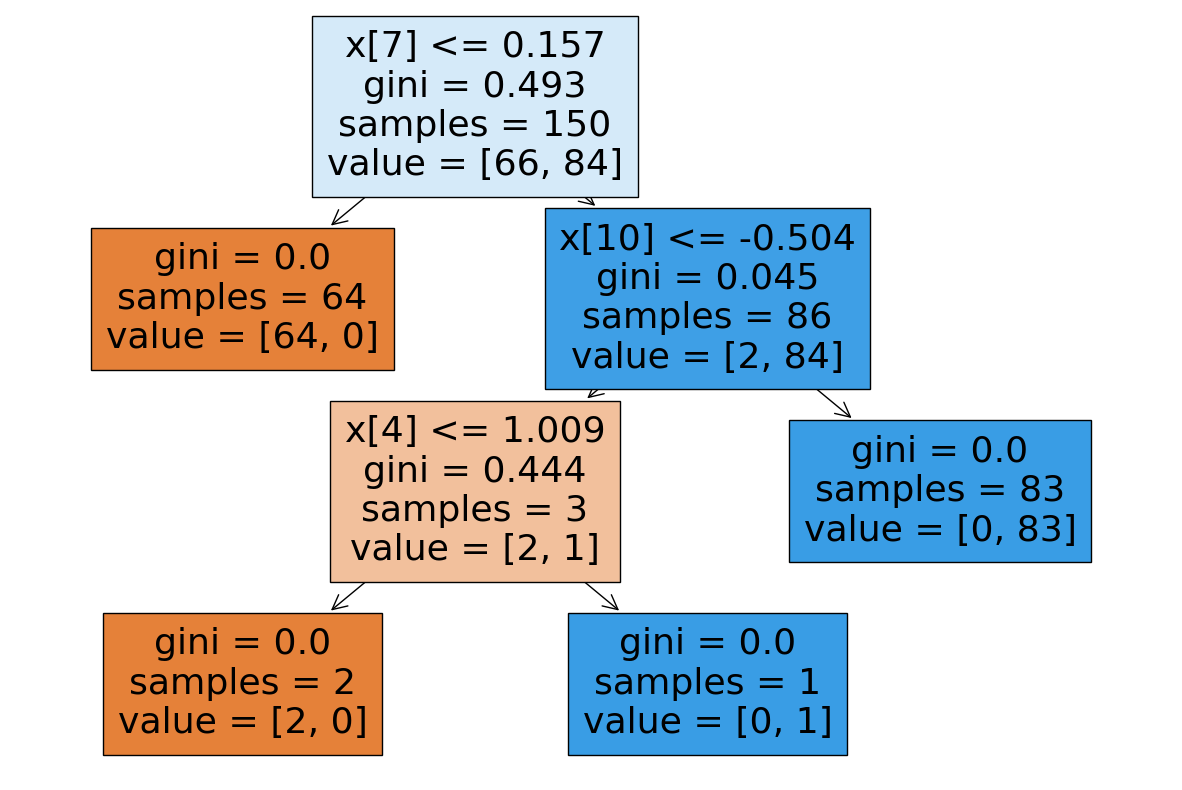

In [104]:
# Plot the decision tree 
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(dtc, filled = True)
plt.show()

## Regularization Techniques

* This tecninique is often used increasing the variance of the model, maintaining low bias
* Prevents the model from overfitting by including a penalty on large coefficients

In [90]:
# Import libraries for using Rigge regularization
from sklearn.linear_model import Ridge

# A smaller alpha value means less (strength) regularization, allowing the model to fit the training data more closely
rdg = Ridge(alpha = 0.001)
rdg.fit(X_train, y_train)
y_pred_rdg = rdg.predict(X_test)

# Show results

# The beneficial finds the best fit lines, 
# adding a penalty equal to the sum of the squared coefficients (L2 penalty) to the loss function

# The variance in the target variable is explained by the model
print(f'R2 Score: {r2_score(y_test, y_pred_rdg)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rdg)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rdg)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rdg))}\n')

# Check for potential multicollinearity (features with highly correlated) issues using Ridge
# The coefficient estimates towards zero
print('List of features potentialy have multicollinearity like FFMC and BUI:\n')
for i, col in enumerate(X.columns):
    print(f'{col} : {rdg.coef_[i]}')

R2 Score: 0.6812958528879602
MAE: 0.2386019613302466
MSE: 0.07811918046913219
RMSE: 0.27949808670030674

List of features potentialy have multicollinearity like FFMC and BUI:

day : -0.0009161699965855586
month : -0.018005598104413788
year : 0.0
Temperature : -0.015213742630027966
RH : 0.13372587329106267
Ws : -0.032339926363888744
Rain : 0.04717300213268858
FFMC : 0.3336530614456211
DMC : -0.10600069210899785
DC : 0.06461064746605737
ISI : 0.11916390604805219
FWI : 0.1679075488763097


In [91]:
# Check coeficent and intercept to stablish input variables 
rdg.coef_, rdg.intercept_

(array([-0.00091617, -0.0180056 ,  0.        , -0.01521374,  0.13372587,
        -0.03233993,  0.047173  ,  0.33365306, -0.10600069,  0.06461065,
         0.11916391,  0.16790755]),
 0.6983483525222117)

In [37]:
# Import libraries for using lasso regularization
from sklearn.linear_model import Lasso

# A smaller alpha value means less (strength) regularization, allowing the model to fit the training data more closely
lss = Lasso(alpha = 0.001)
lss.fit(X_train, y_train)
y_pred_lss = lss.predict(X_test)

# Show results

# The beneficial finds the best fit lines, 
# adding a penalty equal to the sum of the squared coefficients (L1 penalty) can drive some coefficients to exactly zero 


# The variance in the target variable is explained by the model
print(f'R2 Score: {r2_score(y_test, y_pred_lss)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_lss)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lss)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lss))}\n')

# Check for potential multicollinearity (features with highly correlated) issues using Lasso
# The coefficient estimates towards zero
print('List of features potentialy have multicollinearity such as FFMC and FWI:\n')
for i, col in enumerate(X.columns):
    print(f'{col} : {lss.coef_[i]}')

R2 Score: 0.6796322777315809
MAE: 0.2398894424059817
MSE: 0.07852694776379332
RMSE: 0.28022660074267275

List of features potentialy have multicollinearity such as FFMC and BUI:

day : -0.0006717826576534564
month : -0.015696076343835113
year : 0.0
Temperature : -0.011319455418226865
RH : 0.12915210259829427
Ws : -0.027510797514011278
Rain : 0.04291758653204871
FFMC : 0.32663386004644934
DMC : -0.08638710823127937
DC : 0.05567789103171773
ISI : 0.1234731708119344
BUI : 0.0
FWI : 0.14966321142380426


In [92]:
# Check coeficent and intercept to stablish input variables 
lss.coef_, lss.intercept_

(array([-0.00067178, -0.01569608,  0.        , -0.01131946,  0.1291521 ,
        -0.0275108 ,  0.04291759,  0.32663386, -0.08638711,  0.05567789,
         0.12347317,  0.        ,  0.14966321]),
 0.6774280187298752)

In [93]:
# Import libraries for using ElasticNet regularization
from sklearn.linear_model import ElasticNet

# ElasticNet combines both L1 and L2 penalties
# It introduces two hyperparameters: one for the L1 penalty and one for the L2 penalty. In this case for l1
eln = ElasticNet(alpha = 0.09, l1_ratio = 1)
eln.fit(X_train, y_train)
y_pred_eln = eln.predict(X_test)

# Show results

# The variance in the target variable is explained by the model
print(f'R2 Score: {r2_score(y_test, y_pred_eln)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_eln)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_eln)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_eln))}\n')

# Check for potential multicollinearity (features with highly correlated) issues using ElasticNet
print('List of features potentialy have multicollinearity:\n')
for i, col in enumerate(X.columns):
    print(f'{col} : {eln.coef_[i]}')

R2 Score: 0.5553824238631053
MAE: 0.2890870052563269
MSE: 0.10898245593828382
RMSE: 0.33012490959981167

List of features potentialy have multicollinearity:

day : 0.005803630646660552
month : -0.0
year : 0.0
Temperature : 0.0
RH : -0.0
Ws : -0.0
Rain : -0.0
FFMC : 0.1949908298284957
DMC : 0.0
DC : 0.0
ISI : 0.07280700009066131
FWI : 0.04789423346039398


In [94]:
# Check coeficent and intercept to stablish input variables 
eln.coef_, eln.intercept_

(array([ 0.00580363, -0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.19499083,  0.        ,  0.        ,
         0.072807  ,  0.04789423]),
 0.46582391945946716)

## Effective use of cross-validation and hyperparameter tuning

* Selecting the best hyperparameters to improve the model's performance on unseen data

In [95]:
# Import libraries for using GridSearchCV cross-validation and hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Setting model to investigate best fit intercept parameters by using Linear Regression as a estimator
# This also includes 5-fold cross-validation to evaluate the model performance pursuing as scoring metric the negative mean square error  
grd = GridSearchCV(estimator = LinearRegression(), param_grid = {'fit_intercept':[True,False]}, cv = 5, scoring = 'neg_mean_squared_error')
grd.fit(X_train,y_train)

# Show results for best params
print(f'The best fit intercept for the model: ', grd.best_params_)
print(f'The best score for the model:', grd.best_score_)

The best fit intercept for the model:  {'fit_intercept': True}
The best score for the model: -0.07801337561056883


In [59]:
# Define the dictionary for model names
models = {
        'Linear_reg': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'EN': ElasticNet()
        }

# Define the hyperparameter grid dictionary for each model
param_grids = {
              'Linear_reg' : {'fit_intercept': [True, False]},
              'Ridge' : {'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]},
              'Lasso' : {'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]},
              'EN': {'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
              }


# Initialize dicts for estimators and scores 
best_estimators = {}
best_scores = {}

for name, model in models.items():
    
    print(f"Performing grid search for {name}:")
    
     # Initialize GridSearchCV with the model and its corresponding parameter grid
    grd = GridSearchCV(estimator = model, param_grid = param_grids[name], cv = 5, scoring = 'neg_mean_squared_error')
    
    # Fit the model to the training data
    grd.fit(X_train, y_train)

    # Get the best estimator and its corresponding parameters
    best_estimators[name] = grd.best_estimator_
    best_scores[name] = mean_squared_error(y_test, grd.best_estimator_.predict(X_test))

    # Print the best model details
    print(f"Best model:{name}")
    print(f"Best params:{grd.best_params_}")
    print(f'Test MSE:{best_scores[name]}\n')

Performing grid search for Linear_reg:
Best model:Linear_reg
Best params:{'fit_intercept': True}
Test MSE:0.07734247006297515

Performing grid search for Ridge:
Best model:Ridge
Best params:{'alpha': 0.9}
Test MSE:0.07828464858710447

Performing grid search for Lasso:
Best model:Lasso
Best params:{'alpha': 0.1}
Test MSE:0.1118344896865807

Performing grid search for EN:
Best model:EN
Best params:{'alpha': 0.1, 'l1_ratio': 0.1}
Test MSE:0.09007012004737162



In summary, Linear Regression had the best performance with the lowest test MSE. Ridge Regression was a close second, suggesting a good balance between bias and variance without overfitting. Additionally, Elastic Net performed better than lasso regression but was outperformed by linear and ridge regression. Lasso Regression had the highest test MSE, indicating that it was the least effective model for this particular dataset.  
Overall, the results suggest that a simple linear regression model with an intercept (fit_intercept=True) is the best choice for this dataset, providing the lowest test MSE and thus the best predictive performance.

## Test and Evaluation the Models 

#### Multiple Linear  Regression Model

In [96]:
# Testing the Multiple Linear Regression Model
y_pred_mlr = mlr.predict(X_test)
y_pred_mlr

array([ 0.86543733,  0.82588163,  0.02215568,  0.39683824,  0.68612984,
        0.26193859,  0.65551962,  0.4883109 ,  0.46865919,  0.22846495,
        0.26531044,  0.37260454,  0.80084006,  0.92904748,  1.09613787,
        0.30848066, -0.09750633, -0.35186178,  0.87270712,  0.55908906,
        0.59152999,  0.11534812,  0.71637974, -0.01897602,  1.18791909,
        0.48167086,  0.73734384,  0.85577548, -0.31485542,  0.86405317,
        0.81153162,  0.12869259,  0.89071791,  0.96968774,  0.3909155 ,
        0.3628747 ,  0.59269069,  0.45977818, -0.15007044, -0.38642861,
        0.58870436,  0.41980412,  0.76697411, -0.3605318 ,  0.9723062 ,
        0.82417536,  0.79939707,  0.14468539,  0.87821511,  0.08430614,
        1.1367657 ,  0.49408202,  1.03033744,  1.17792617,  1.03988314,
        0.89353675,  0.2651263 ,  0.77413804,  0.69094283,  0.80571355,
        0.60381491,  0.40560799,  0.03216531,  1.19711249,  0.32480768,
        0.17027429,  0.82940894,  0.70319241,  0.6340717 , -0.29

In [97]:
# Evaluating the Multiple Linear Regression Model using Metrics

# Print results
print(f'R2 Score: {r2_score(y_test, y_pred_mlr)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_mlr)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_mlr)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_mlr))}\n')

R2 Score: 0.6812976391858654
MAE: 0.238600537306335
MSE: 0.07811874262064576
RMSE: 0.27949730342285195



* R2 score of approximately 0.68 indicates that the model explains about 68% of the variance in the dependent variable. This is generally considered a moderately good fit, meaning the model has captured a significant amount of the underlying data structure but there is still room for improvement. 

* The MAE and RMSE values provide insight into the average prediction error, with the RMSE being slightly higher due to the penalization of larger errors.

* The MSE value indicates the average squared error magnitude, which is useful for comparison but less interpretable on its own.

* In summary, these results indicate that the model is reasonably effective in predicting the target variable, though there is some room for improvement. The R2 score suggests a good fit, while the MAE and RMSE indicate the model's prediction errors are relatively low, though not negligible.

#### Polynomial Regression Model

In [99]:
# Testing Polynomial Regression Model
y_pred_plm = lrm.predict(X_test_plm)
y_pred_plm

array([ 1.07353443,  1.10208453, -0.1237422 ,  0.44537313,  0.68619863,
        0.11119418,  0.81057848,  1.12477337,  0.29713933,  0.31680399,
       -0.76655242,  0.85264774,  1.192452  ,  1.09672633,  1.09785436,
        0.03423565, -0.23584391,  0.17576481,  1.18250868,  0.76561801,
        0.30982979, -0.05192331,  0.98296543, -0.05104557,  1.29903728,
        0.89355962,  0.93453018,  0.94930564, -1.22773569,  0.98546586,
        0.9845983 , -0.14962767,  0.97266556,  1.05710622,  0.25871254,
        0.14870567,  0.55431854,  0.69458028, -0.15338675,  0.26454209,
        0.94097944,  0.20302427,  1.10087938,  0.07004521,  1.2309501 ,
        0.98142871,  0.79441754,  0.13509256,  0.97242756, -0.20046592,
        1.26339388,  0.83145666,  0.19343304,  1.00070785,  1.13327014,
        1.05073241, -0.04234147,  0.83731622,  0.82751235,  1.24960257,
        0.73279284,  0.06217534,  0.08180111,  1.3454565 ,  0.25158097,
       -0.51129392,  1.04552156,  0.73011587,  1.23574288,  0.10

In [100]:
# Evaluating Polynomial Regression using Metrics

# Print results
print(f'R2 Score: {r2_score(y_test, y_pred_plm)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_plm)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_plm)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_plm))}')

R2 Score: 0.6562212640554175
MAE: 0.20896906027291584
MSE: 0.08426533936900392
RMSE: 0.2902849279053322


* The R2 score of the Multiple Linear Regression Model is higher (0.6813) compared to the Polynomial Regression Model (0.6562). This indicates that the Multiple Linear Regression Model explains a larger proportion of the variance in the dependent variable.
* The Multiple Linear Regression Model performs better in terms of explaining the variance in the data, with a higher R2 score.
* The Polynomial Regression Model has a lower MAE, indicating smaller average prediction errors.
* Both MSE and RMSE are lower for the Multiple Linear Regression Model, suggesting it is more accurate overall and less sensitive to larger errors.
* The Multiple Linear Regression Model seems to be a better choice overall given its higher R2 score and lower MSE and RMSE, despite the Polynomial Regression Model having a lower MAE. The higher R2 score and lower MSE/RMSE indicate that the Multiple Linear Regression Model fits the data better and is generally more reliable for making predictions.

#### Decision Tree Classifier Model

In [106]:
# Testing Decision Tree Classifier Model
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, precision_score, recall_score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy Score: 0.989247311827957
Confusion Matrix:
 [[39  1]
 [ 0 53]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        53

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93

F1 Score: 0.9906542056074767
Precision Score: 0.9814814814814815
Recall Score: 1.0
ROC AUC Score: 0.9874999999999999


* Accuracy is high (98.92%), indicating that the model performs very well overall.
* The confusion matrix shows only one misclassification (false positive), which is a good result.
* Precision and recall are both very high, especially recall (1.0) for class 1, indicating that the model is very effective at identifying all positive instances.
* The F1 score and ROC AUC score confirm that the model has strong classification performance with a good balance between precision and recall.

#### Effective use of cross-validation and hyperparameter tuning for Decision Tree Model

In [114]:
# Define parameters for pre-pruning criteria using hyperparameter tuning
params = {
            'criterion':["gini", "entropy", "log_loss"],
             'max_depth':[1,2,3,4,5],
             'max_features':['auto', 'sqrt', 'log2']
             }

# Setting model to investigate best fit parameters by using GridSearchCV
# This also includes 5-fold cross-validation to evaluate the model performance
grd = GridSearchCV(dtc, param_grid = params, cv = 5)
grd.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [115]:
# Show results for best params
print(f'The best fit intercept for the model: ', grd.best_params_)
print(f'The best score for the model:', grd.best_score_)

The best fit intercept for the model:  {'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt'}
The best score for the model: 0.9866666666666667


In [116]:
# Evaluate Decision Tree Classifier after using hyperparameter tuning
y_pred_grd = grd.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_grd))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grd))
print("Classification Report:\n", classification_report(y_test, y_pred_grd))
print("F1 Score:", f1_score(y_test, y_pred_grd))
print("Precision Score:", precision_score(y_test, y_pred_grd))
print("Recall Score:", recall_score(y_test, y_pred_grd))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_grd))

Accuracy Score: 0.989247311827957
Confusion Matrix:
 [[39  1]
 [ 0 53]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        53

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93

F1 Score: 0.9906542056074767
Precision Score: 0.9814814814814815
Recall Score: 1.0
ROC AUC Score: 0.9874999999999999


#### Create pickle files and test the model on unseen data and test the model on unseen data

In [123]:
import pickle
pickle.dump(grd, open('model.pkl', 'wb'))

# Load the saved model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
    
X_unseen = np.array([[13, 6, 2012, 27, 84, 21, 1.2, 50, 6.7, 17, 0.5, 0.2]])

# Make predictions on the unseen data
predictions = model.predict(X_unseen)

# Print the predictions
print("Predictions on unseen data:", predictions)

Predictions on unseen data: [1]
